In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("../input/trojan-detection/Trojan_Detection.csv", sep = r',', skipinitialspace = True)
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
4,169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,Benign


In [3]:
df = df.dropna()

df.drop(["Unnamed: 0"], axis = 1).values

df = df.replace("Trojan", 1)
df = df.replace("Benign", 0)
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,0


In [4]:
from sklearn import preprocessing

number = preprocessing.LabelEncoder()

df["Flow ID"] = number.fit_transform(df["Flow ID"])
df["Source IP"] = number.fit_transform(df["Source IP"])
df["Destination IP"] = number.fit_transform(df["Destination IP"])
df["Timestamp"] = number.fit_transform(df["Timestamp"])

df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,46111,7,49975,352,80,6,36269,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,72089,74905,7,49169,895,443,17,39241,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96676,9217,7,37749,7,53,17,42069,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,42891,10418,7,41352,7,53,17,29885,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,169326,20763,5,44353,220,443,6,16589,65633087,12,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,0


In [5]:
from sklearn import preprocessing

number = preprocessing.LabelEncoder()

df["Flow ID"] = number.fit_transform(df["Flow ID"])
df["Source IP"] = number.fit_transform(df["Source IP"])
df["Destination IP"] = number.fit_transform(df["Destination IP"])
df["Timestamp"] = number.fit_transform(df["Timestamp"])

df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,46111,7,49975,352,80,6,36269,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,72089,74905,7,49169,895,443,17,39241,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96676,9217,7,37749,7,53,17,42069,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,42891,10418,7,41352,7,53,17,29885,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,169326,20763,5,44353,220,443,6,16589,65633087,12,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,0


2022-03-19 21:16:37.535291: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-19 21:16:37.734419: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               11008     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 27,649
Trainable params: 27,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3550/3550 [==============================] - 13s 3ms/step - loss: 0.2029 - accuracy: 0.9581 - val_loss: 0.0

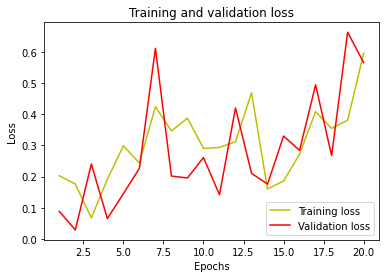

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(["Class"], axis = 1).values

y = df["Class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()

model.add(Dense(128, input_dim=85, activation='relu'))
model.add(Dense(64, input_dim=85, activation='relu'))

model.add(Dense(64, input_dim=85, activation='relu'))
model.add(Dense(64, input_dim=85, activation='relu'))

model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =20)

from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()